In [56]:
import numpy as np
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
import qiskit as qk
from qiskit import QuantumCircuit, Aer, IBMQ
from qiskit import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import plot_histogram
from qiskit.quantum_info import Statevector
from math import pi

In [43]:
qr=QuantumRegister(3,'pv')
qr1=QuantumRegister(2,'pos')
cr=ClassicalRegister(2)
qc=QuantumCircuit(qr,qr1,cr)
qc.draw()

pv_0: 
       
 pv_1: 
       
 pv_2: 
       
pos_0: 
       
pos_1: 
       
c11: 2/

In [44]:
#Setting position value
qc.h(4)
qc.h(3)
for k in range(3):
    qc.i(k)
qc.barrier()
qc.draw()

┌───┐ ░ 
 pv_0: ┤ I ├─░─
       ├───┤ ░ 
 pv_1: ┤ I ├─░─
       ├───┤ ░ 
 pv_2: ┤ I ├─░─
       ├───┤ ░ 
pos_0: ┤ H ├─░─
       ├───┤ ░ 
pos_1: ┤ H ├─░─
       └───┘ ░ 
c11: 2/════════

In [45]:
#pixel1
qc.x(3)
qc.x(4)
qc.ccx(3,4,0)
qc.ccx(3,4,2)
qc.x(3)
qc.x(4)
qc.barrier()
qc.draw()

┌───┐ ░      ┌───┐           ░ 
 pv_0: ┤ I ├─░──────┤ X ├───────────░─
       ├───┤ ░      └─┬─┘           ░ 
 pv_1: ┤ I ├─░────────┼─────────────░─
       ├───┤ ░        │  ┌───┐      ░ 
 pv_2: ┤ I ├─░────────┼──┤ X ├──────░─
       ├───┤ ░ ┌───┐  │  └─┬─┘┌───┐ ░ 
pos_0: ┤ H ├─░─┤ X ├──■────■──┤ X ├─░─
       ├───┤ ░ ├───┤  │    │  ├───┤ ░ 
pos_1: ┤ H ├─░─┤ X ├──■────■──┤ X ├─░─
       └───┘ ░ └───┘          └───┘ ░ 
c11: 2/═══════════════════════════════

In [46]:
#pixel2
qc.x(4)
qc.ccx(3,4,1)
qc.ccx(3,4,2)
qc.x(4)
qc.barrier()
qc.draw()

┌───┐ ░      ┌───┐           ░                      ░ 
 pv_0: ┤ I ├─░──────┤ X ├───────────░──────────────────────░─
       ├───┤ ░      └─┬─┘           ░      ┌───┐           ░ 
 pv_1: ┤ I ├─░────────┼─────────────░──────┤ X ├───────────░─
       ├───┤ ░        │  ┌───┐      ░      └─┬─┘┌───┐      ░ 
 pv_2: ┤ I ├─░────────┼──┤ X ├──────░────────┼──┤ X ├──────░─
       ├───┤ ░ ┌───┐  │  └─┬─┘┌───┐ ░        │  └─┬─┘      ░ 
pos_0: ┤ H ├─░─┤ X ├──■────■──┤ X ├─░────────■────■────────░─
       ├───┤ ░ ├───┤  │    │  ├───┤ ░ ┌───┐  │    │  ┌───┐ ░ 
pos_1: ┤ H ├─░─┤ X ├──■────■──┤ X ├─░─┤ X ├──■────■──┤ X ├─░─
       └───┘ ░ └───┘          └───┘ ░ └───┘          └───┘ ░ 
c11: 2/══════════════════════════════════════════════════════

In [47]:
#pixel3
qc.x(3)
qc.ccx(3,4,0)
qc.ccx(3,4,1)
qc.ccx(3,4,2)
qc.x(3)
qc.barrier()
qc.draw()

┌───┐ ░      ┌───┐           ░                      ░      ┌───┐     »
 pv_0: ┤ I ├─░──────┤ X ├───────────░──────────────────────░──────┤ X ├─────»
       ├───┤ ░      └─┬─┘           ░      ┌───┐           ░      └─┬─┘┌───┐»
 pv_1: ┤ I ├─░────────┼─────────────░──────┤ X ├───────────░────────┼──┤ X ├»
       ├───┤ ░        │  ┌───┐      ░      └─┬─┘┌───┐      ░        │  └─┬─┘»
 pv_2: ┤ I ├─░────────┼──┤ X ├──────░────────┼──┤ X ├──────░────────┼────┼──»
       ├───┤ ░ ┌───┐  │  └─┬─┘┌───┐ ░        │  └─┬─┘      ░ ┌───┐  │    │  »
pos_0: ┤ H ├─░─┤ X ├──■────■──┤ X ├─░────────■────■────────░─┤ X ├──■────■──»
       ├───┤ ░ ├───┤  │    │  ├───┤ ░ ┌───┐  │    │  ┌───┐ ░ └───┘  │    │  »
pos_1: ┤ H ├─░─┤ X ├──■────■──┤ X ├─░─┤ X ├──■────■──┤ X ├─░────────■────■──»
       └───┘ ░ └───┘          └───┘ ░ └───┘          └───┘ ░                »
c11: 2/═════════════════════════════════════════════════════════════════════»
                                                                            »
«                  ░ 
« pv_0: ───────────░─
«                  ░ 
« pv_1: ───────────░─
«       ┌───┐      ░ 
« pv_2: ┤ X ├──────░─
«       └─┬─┘┌───┐ ░ 
«pos_0: ──■──┤ X ├─░─
«         │  └───┘ ░ 
«pos_1: ──■────────░─
«                  ░ 
«c11: 2/═════════════
«

In [48]:
#pixel4
for k in range(3):
    qc.i(k)
qc.barrier()
qc.draw()

┌───┐ ░      ┌───┐           ░                      ░      ┌───┐     »
 pv_0: ┤ I ├─░──────┤ X ├───────────░──────────────────────░──────┤ X ├─────»
       ├───┤ ░      └─┬─┘           ░      ┌───┐           ░      └─┬─┘┌───┐»
 pv_1: ┤ I ├─░────────┼─────────────░──────┤ X ├───────────░────────┼──┤ X ├»
       ├───┤ ░        │  ┌───┐      ░      └─┬─┘┌───┐      ░        │  └─┬─┘»
 pv_2: ┤ I ├─░────────┼──┤ X ├──────░────────┼──┤ X ├──────░────────┼────┼──»
       ├───┤ ░ ┌───┐  │  └─┬─┘┌───┐ ░        │  └─┬─┘      ░ ┌───┐  │    │  »
pos_0: ┤ H ├─░─┤ X ├──■────■──┤ X ├─░────────■────■────────░─┤ X ├──■────■──»
       ├───┤ ░ ├───┤  │    │  ├───┤ ░ ┌───┐  │    │  ┌───┐ ░ └───┘  │    │  »
pos_1: ┤ H ├─░─┤ X ├──■────■──┤ X ├─░─┤ X ├──■────■──┤ X ├─░────────■────■──»
       └───┘ ░ └───┘          └───┘ ░ └───┘          └───┘ ░                »
c11: 2/═════════════════════════════════════════════════════════════════════»
                                                                            »
«                  ░ ┌───┐ ░ 
« pv_0: ───────────░─┤ I ├─░─
«                  ░ ├───┤ ░ 
« pv_1: ───────────░─┤ I ├─░─
«       ┌───┐      ░ ├───┤ ░ 
« pv_2: ┤ X ├──────░─┤ I ├─░─
«       └─┬─┘┌───┐ ░ └───┘ ░ 
«pos_0: ──■──┤ X ├─░───────░─
«         │  └───┘ ░       ░ 
«pos_1: ──■────────░───────░─
«                  ░       ░ 
«c11: 2/═════════════════════
«

In [49]:
qc.measure_all()
qc.draw()

┌───┐ ░      ┌───┐           ░                      ░      ┌───┐     »
  pv_0: ┤ I ├─░──────┤ X ├───────────░──────────────────────░──────┤ X ├─────»
        ├───┤ ░      └─┬─┘           ░      ┌───┐           ░      └─┬─┘┌───┐»
  pv_1: ┤ I ├─░────────┼─────────────░──────┤ X ├───────────░────────┼──┤ X ├»
        ├───┤ ░        │  ┌───┐      ░      └─┬─┘┌───┐      ░        │  └─┬─┘»
  pv_2: ┤ I ├─░────────┼──┤ X ├──────░────────┼──┤ X ├──────░────────┼────┼──»
        ├───┤ ░ ┌───┐  │  └─┬─┘┌───┐ ░        │  └─┬─┘      ░ ┌───┐  │    │  »
 pos_0: ┤ H ├─░─┤ X ├──■────■──┤ X ├─░────────■────■────────░─┤ X ├──■────■──»
        ├───┤ ░ ├───┤  │    │  ├───┤ ░ ┌───┐  │    │  ┌───┐ ░ └───┘  │    │  »
 pos_1: ┤ H ├─░─┤ X ├──■────■──┤ X ├─░─┤ X ├──■────■──┤ X ├─░────────■────■──»
        └───┘ ░ └───┘          └───┘ ░ └───┘          └───┘ ░                »
 c11: 2/═════════════════════════════════════════════════════════════════════»
                                                                             »
meas: 5/═════════════════════════════════════════════════════════════════════»
                                                                             »
«                   ░ ┌───┐ ░  ░ ┌─┐            
«  pv_0: ───────────░─┤ I ├─░──░─┤M├────────────
«                   ░ ├───┤ ░  ░ └╥┘┌─┐         
«  pv_1: ───────────░─┤ I ├─░──░──╫─┤M├─────────
«        ┌───┐      ░ ├───┤ ░  ░  ║ └╥┘┌─┐      
«  pv_2: ┤ X ├──────░─┤ I ├─░──░──╫──╫─┤M├──────
«        └─┬─┘┌───┐ ░ └───┘ ░  ░  ║  ║ └╥┘┌─┐   
« pos_0: ──■──┤ X ├─░───────░──░──╫──╫──╫─┤M├───
«          │  └───┘ ░       ░  ░  ║  ║  ║ └╥┘┌─┐
« pos_1: ──■────────░───────░──░──╫──╫──╫──╫─┤M├
«                   ░       ░  ░  ║  ║  ║  ║ └╥┘
« c11: 2/═════════════════════════╬══╬══╬══╬══╬═
«                                 ║  ║  ║  ║  ║ 
«meas: 5/═════════════════════════╩══╩══╩══╩══╩═
«                                 0  1  2  3  4

{'00101 00': 2204, '10111 00': 2232, '11000 00': 2217, '01110 00': 2259}


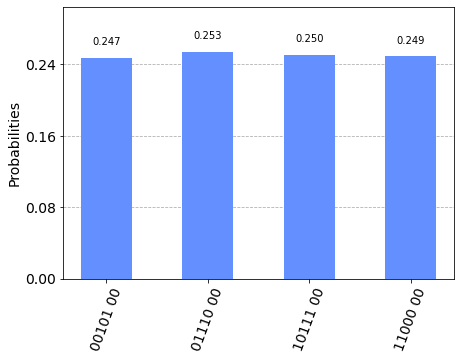

In [59]:
#Running on simulator
aer_sim=Aer.get_backend('aer_simulator')
qc.save_statevector()
t_qc=transpile(qc,aer_sim)
job=aer_sim.run(t_qc, shots=8912)
result=job.result()
counts=result.get_counts()
print(counts)
plot_histogram(counts)

In [53]:
#circuitanalysis
print('Circuit dimensions')
print('Circuit depth: ',qc.decompose().depth())
print('Circuit size: ',qc.decompose().size())
qc.decompose().count_ops()

Circuit dimensions
Circuit depth:  79
Circuit size:  126


OrderedDict([('cx', 42),
             ('t', 28),
             ('tdg', 21),
             ('h', 14),
             ('u3', 8),
             ('id', 6),
             ('barrier', 6),
             ('measure', 5),
             ('u2', 2)])